# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# Your code here:
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
customers.info()
##All dtypes in order, and no missing data too

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
customers.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

# OUTLIERS

In [6]:
cols=customers.copy()



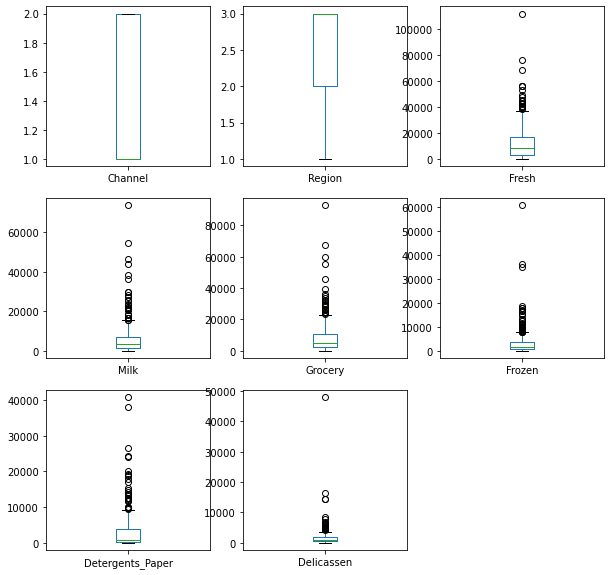

In [7]:
plt.figure(figsize=(10,10))
for i in range(len(cols.columns)):
    plt.subplot(3,3,i+1)
    cols[cols.columns[i]].plot(kind='box')
    #plt.xlabel(cols.columns[i])

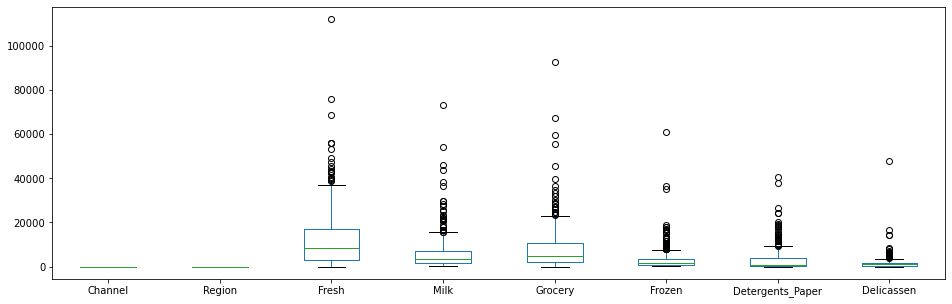

In [8]:
cols.plot(kind='box', figsize = (16, 5));

In [10]:
##counting the quantiles
cus_quan=cols.copy()
def quan_test(low_q,high_q,df):
    q1 = df.quantile(low_q)
    q3 = df.quantile(high_q)
    iqr = q3-q1
    count=((df < (q1-1.5*iqr))|(df > (q3+1.5*iqr))).sum()
    return count


In [11]:
#25,75 test
quan_test(.25,.75,cus_quan)

Channel              0
Region               0
Fresh               20
Milk                28
Grocery             24
Frozen              43
Detergents_Paper    30
Delicassen          27
dtype: int64

In [12]:
#20,80 test
quan_test(.2,.8,cus_quan)
#this is a good quantile aproximation

Channel              0
Region               0
Fresh               12
Milk                20
Grocery             15
Frozen              20
Detergents_Paper    25
Delicassen          20
dtype: int64

In [13]:
#removing outliers
def remove_outl(low_q,high_q,df):
    Q1 = df.quantile(low_q)
    Q3 = df.quantile(high_q)
    IQR = Q3 - Q1
    no_outl = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
    return no_outl

In [14]:
no_outl=remove_outl(.25,.75,cus_quan)
no_outl
cust_quan = cus_quan[no_outl]
cust_quan

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669.0,9656.0,7561.0,214.0,2674.0,1338.0
1,2,3,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
2,2,3,6353.0,8808.0,7684.0,2405.0,3516.0,NaN
3,1,3,13265.0,1196.0,4221.0,6404.0,507.0,1788.0
4,2,3,22615.0,5410.0,7198.0,3915.0,1777.0,NaN
...,...,...,...,...,...,...,...,...
435,1,3,29703.0,12051.0,16027.0,NaN,182.0,2204.0
436,1,3,NaN,1431.0,764.0,4510.0,93.0,2346.0
437,2,3,14531.0,15488.0,NaN,437.0,NaN,1867.0
438,1,3,10290.0,1981.0,2232.0,1038.0,168.0,2125.0


In [15]:
cust_quan.isna().sum() #the same as the outliers count, of course

Channel              0
Region               0
Fresh               20
Milk                28
Grocery             24
Frozen              43
Detergents_Paper    30
Delicassen          27
dtype: int64

In [16]:
#the removed outliers became NaN, so we´re taking care of it with the following for
for column in cust_quan.columns:
    cust_quan[column].fillna((cust_quan[column].mean()), inplace=True)

In [17]:
cust_quan.isna().sum() 

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

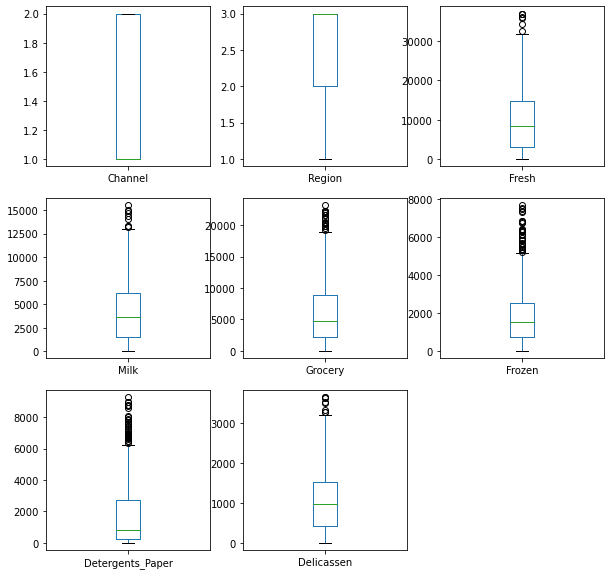

In [18]:
plt.figure(figsize=(10,10))
for i in range(len(cust_quan.columns)):
    plt.subplot(3,3,i+1)
    cust_quan[cust_quan.columns[i]].plot(kind='box')
#the boxplots have taken a much better shape

# CORRELATION original df vs quantilized df

In [19]:
sns.set(style="white")
c_corr = customers.corr(method = 'spearman')
mask = np.triu(np.ones_like(c_corr, dtype=np.bool))

In [20]:
#to show the lower half of the correlation matrix
mask

array([[ True,  True,  True,  True,  True,  True,  True,  True],
       [False,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True],
       [False, False, False, False, False, False, False,  True]])

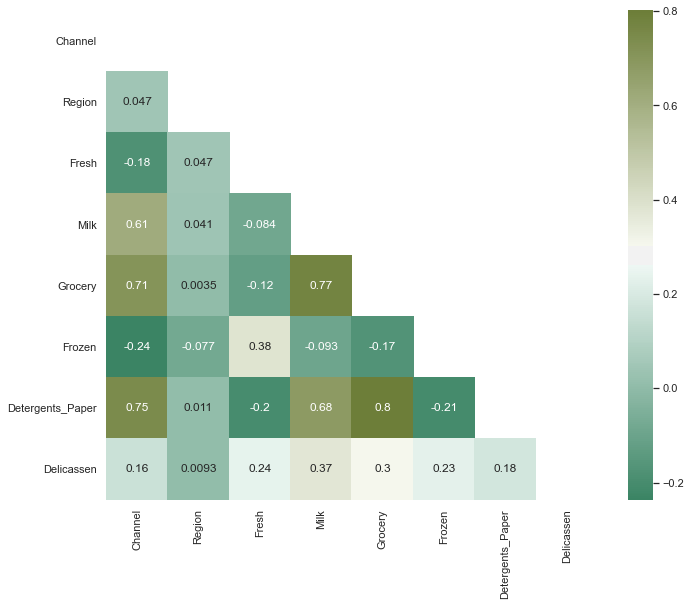

In [21]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(150, 100, as_cmap=True)

sns.heatmap(c_corr, cmap=cmap, annot=True, mask = mask)

In [22]:
#cust_quant is the new valid dataframe 
sns.set(style="white")
q_corr = cust_quan.corr(method = 'spearman')
mask = np.triu(np.ones_like(q_corr, dtype=np.bool))


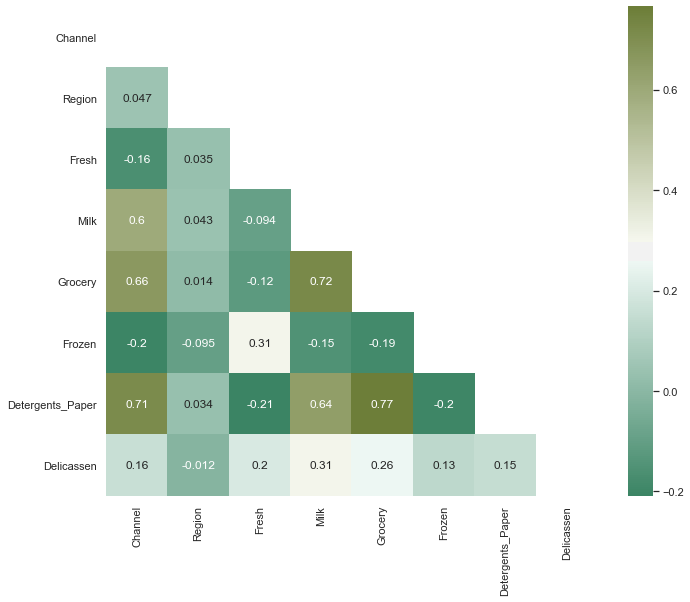

In [23]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(150, 100, as_cmap=True)

sns.heatmap(q_corr, cmap=cmap, annot=True, mask = mask)

What does each column mean?

-The first two columns are categorical for the rest of the products columns.

Any categorical data to convert?

-No, all the columns are numerical and contain numbers.

Any missing data to remove?

-No.

Column collinearity - any high correlations?

-The highest correlation was 80% and some on the seventy range, after the outliers cleaning, the values droped.

Descriptive statistics - any outliers to remove?

-Yes, there were some high outliers.

Column-wise data distribution - is the distribution skewed?

-No.

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [24]:
#For order and cleanliness matters, these process was made above.

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [43]:
# Your import here:

from sklearn.preprocessing import StandardScaler

cstmrs=cust_quan.copy()



In [44]:
scaler = StandardScaler()
cus_ss = scaler.fit_transform(cstmrs)
cus_ss = pd.DataFrame(cus_ss, columns = cstmrs.columns)
cus_ss.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.303889,1.570218,0.236321,-1.032510,0.355249,0.293160
1,1.448652,0.590668,-0.361486,1.615589,0.613433,-0.104763,0.631652,0.815260
2,1.448652,0.590668,-0.444954,1.320382,0.259433,0.280599,0.731229,0.000000
3,-0.690297,0.590668,0.374553,-0.922253,-0.391258,2.677279,-0.612386,0.829565
4,1.448652,0.590668,1.483116,0.319268,0.168114,1.185572,-0.045290,0.000000


In [45]:
#we want to scale the products values, but we dont want to scale the channel and region columns, so we´re returning
#the original columns
cus_ss['Channel'] = customers['Channel']
cus_ss['Region'] = customers['Region']
cus_ss.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,0.303889,1.570218,0.236321,-1.032510,0.355249,0.293160
1,2,3,-0.361486,1.615589,0.613433,-0.104763,0.631652,0.815260
2,2,3,-0.444954,1.320382,0.259433,0.280599,0.731229,0.000000
3,1,3,0.374553,-0.922253,-0.391258,2.677279,-0.612386,0.829565
4,2,3,1.483116,0.319268,0.168114,1.185572,-0.045290,0.000000


# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [46]:
# Your code here:
from sklearn.cluster import KMeans
customers_km = KMeans(n_clusters = 4).fit(cus_ss)
cus_ss['KM_labels'] = customers_km.labels_
cus_ss.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,KM_labels
0,2,3,0.303889,1.570218,0.236321,-1.032510,0.355249,0.293160,2
1,2,3,-0.361486,1.615589,0.613433,-0.104763,0.631652,0.815260,2
2,2,3,-0.444954,1.320382,0.259433,0.280599,0.731229,0.000000,2
3,1,3,0.374553,-0.922253,-0.391258,2.677279,-0.612386,0.829565,3
4,2,3,1.483116,0.319268,0.168114,1.185572,-0.045290,0.000000,0


Count the values in `labels`.

In [47]:
# Your code here:
cus_ss['KM_labels'].value_counts()

1    200
2    104
0     74
3     62
Name: KM_labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [48]:
# Your code here
cus_fin = cus_ss.copy()
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5).fit(cus_fin)
cus_fin['DBSCAN_labels'] = dbscan.labels_
cus_fin.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,KM_labels,DBSCAN_labels
0,2,3,0.303889,1.570218,0.236321,-1.032510,0.355249,0.293160,2,-1
1,2,3,-0.361486,1.615589,0.613433,-0.104763,0.631652,0.815260,2,-1
2,2,3,-0.444954,1.320382,0.259433,0.280599,0.731229,0.000000,2,-1
3,1,3,0.374553,-0.922253,-0.391258,2.677279,-0.612386,0.829565,3,-1
4,2,3,1.483116,0.319268,0.168114,1.185572,-0.045290,0.000000,0,-1


Count the values in `labels_DBSCAN`.

In [49]:
# Your code here
cus_fin['DBSCAN_labels'].value_counts()

-1    404
 0     31
 1      5
Name: DBSCAN_labels, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

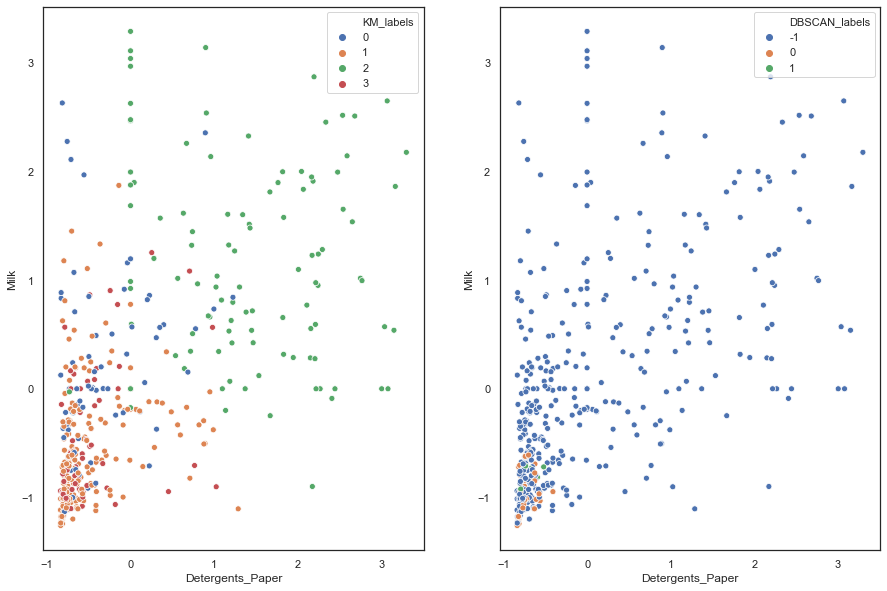

In [50]:

fig, ax = plt.subplots(figsize=(15,10), nrows=1, ncols=2)

plt.sca(ax[0])
sns.scatterplot(data=cus_fin, x='Detergents_Paper', y='Milk', hue='KM_labels',palette='deep')

plt.sca(ax[1])
sns.scatterplot(data=cus_fin, x='Detergents_Paper', y='Milk', hue='DBSCAN_labels',palette='deep')
plt.show();

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

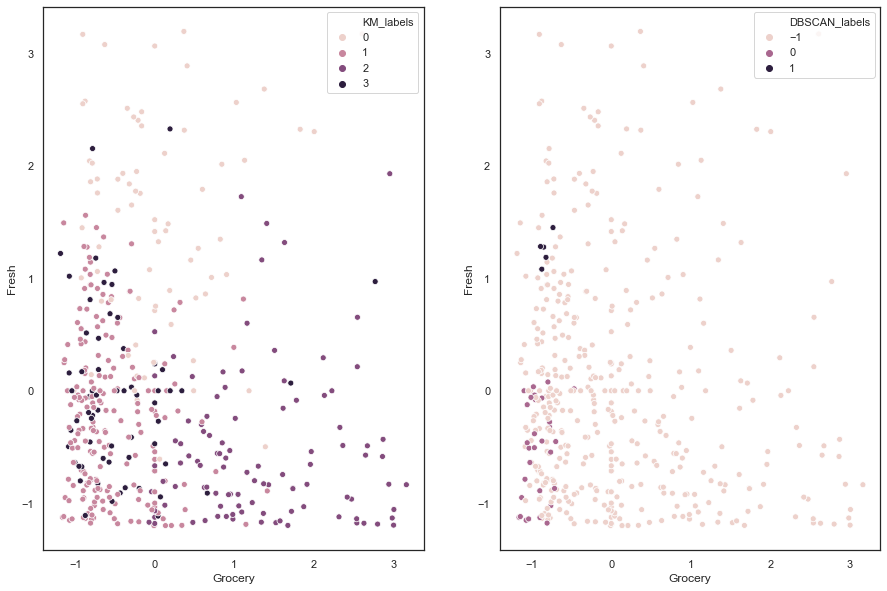

In [51]:

fig, ax = plt.subplots(figsize=(15,10), nrows=1, ncols=2)

plt.sca(ax[0])
sns.scatterplot(data=cus_fin, x='Grocery', y='Fresh', hue='KM_labels')

plt.sca(ax[1])
sns.scatterplot(data=cus_fin, x='Grocery', y='Fresh', hue='DBSCAN_labels')
plt.show();

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

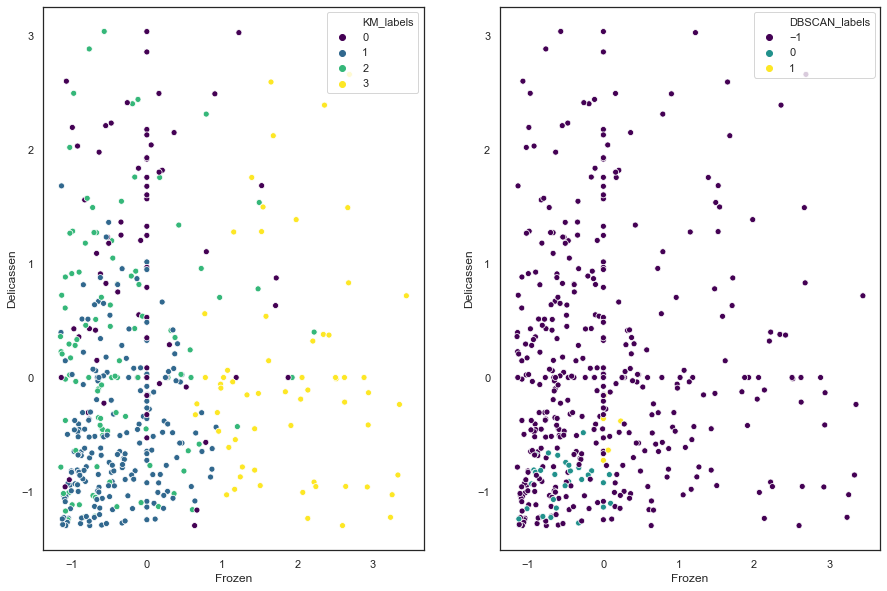

In [52]:

fig, ax = plt.subplots(figsize=(15,10), nrows=1, ncols=2)

plt.sca(ax[0])
sns.scatterplot(data=cus_fin, x='Frozen', y='Delicassen', hue='KM_labels',palette='viridis')

plt.sca(ax[1])
sns.scatterplot(data=cus_fin, x='Frozen', y='Delicassen', hue='DBSCAN_labels',palette='viridis')
plt.show();

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [53]:
# Your code here:
cus_fin.groupby(['KM_labels']).mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,DBSCAN_labels
KM_labels,,,,,,,,,
0,1.297297,2.527027,1.448207,0.149589,0.033280,-0.046408,-0.335677,0.957633,-1.000
1,1.115000,2.610000,-0.252171,-0.546990,-0.553147,-0.384623,-0.484207,-0.487004,-0.795
2,1.884615,2.576923,-0.529407,1.185307,1.297330,-0.362138,1.429004,0.243559,-1.000
3,1.080645,2.290323,-0.027012,-0.402314,-0.431541,1.903567,-0.434434,0.019447,-1.000


In [54]:
cus_fin.groupby(['DBSCAN_labels']).mean()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,KM_labels
DBSCAN_labels,,,,,,,,,
-1,1.351485,2.502475,0.025269,0.083089,0.080661,0.041786,0.063171,0.076750,1.381188
0,1.000000,3.000000,-0.531712,-0.957104,-0.916893,-0.554531,-0.716025,-0.927306,1.000000
1,1.000000,3.000000,1.254906,-0.779540,-0.832668,0.061801,-0.664898,-0.452086,1.000000


Which algorithm appears to perform better?

In [ ]:
#all seem to be very mixed, but the K_means appear to be cleaner

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
#we are comparing the plot with 3,5, and 6 klusters

In [72]:
cus_km=cus_fin.copy()

In [73]:
km_3 = KMeans(n_clusters = 3).fit(cus_km)

In [74]:
cus_km['KM_labels'] = km_3.labels_


In [75]:
cus_km_2=cus_fin.copy()

In [76]:
km_5 = KMeans(n_clusters = 5).fit(cus_km_2)

In [77]:
cus_km_2['KM_labels'] = km_5.labels_


In [79]:
cus_km_3=cus_fin.copy()

In [80]:
km_6 = KMeans(n_clusters = 6).fit(cus_km_3)

In [81]:
cus_km_3['KM_labels'] = km_6.labels_

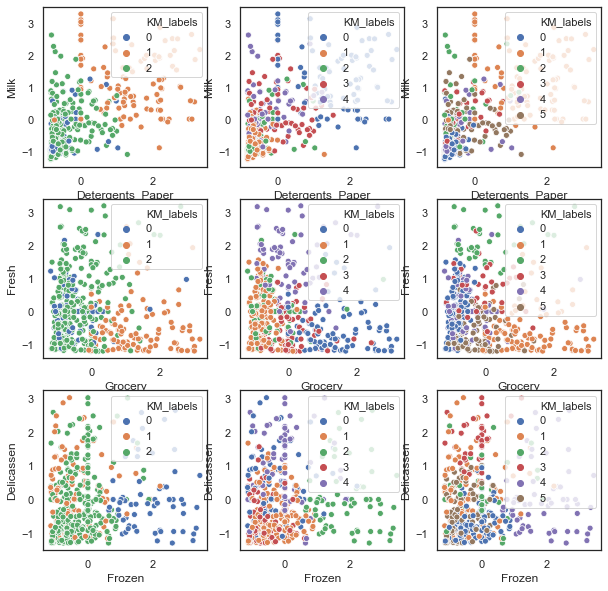

In [88]:
fig, ax = plt.subplots(figsize=(10,10), nrows=3, ncols=3)

plt.sca(ax[0][0])
sns.scatterplot(data=cus_km, x='Detergents_Paper', y='Milk', hue='KM_labels', palette='deep')
plt.sca(ax[0][1])
sns.scatterplot(data=cus_km_2, x='Detergents_Paper', y='Milk', hue='KM_labels', palette='deep')
plt.sca(ax[0][2])
sns.scatterplot(data=cus_km_3, x='Detergents_Paper', y='Milk', hue='KM_labels', palette='deep')

plt.sca(ax[1][0])
sns.scatterplot(data=cus_km, x='Grocery', y='Fresh', hue='KM_labels', palette='deep')
plt.sca(ax[1][1])
sns.scatterplot(data=cus_km_2, x='Grocery', y='Fresh', hue='KM_labels', palette='deep')
plt.sca(ax[1][2])
sns.scatterplot(data=cus_km_3, x='Grocery', y='Fresh', hue='KM_labels', palette='deep')

plt.sca(ax[2][0])
sns.scatterplot(data=cus_km, x='Frozen', y='Delicassen', hue='KM_labels', palette='deep')
plt.sca(ax[2][1])
sns.scatterplot(data=cus_km_2, x='Frozen', y='Delicassen', hue='KM_labels', palette='deep')
plt.sca(ax[2][2])
sns.scatterplot(data=cus_km_3, x='Frozen', y='Delicassen', hue='KM_labels', palette='deep')

plt.show();

In [64]:
#It´s unclear to find out the best option, but the 5 klusters seems to be the most attractive

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [84]:
#the min_samples default is 5, and the eps was set in 0.5
dbscan = DBSCAN(eps=0.75, min_samples=6).fit(cus_km)
cus_km['DBSCAN_labels'] = dbscan.labels_

In [85]:
dbscan = DBSCAN(eps=0.25, min_samples=7).fit(cus_km_2)
cus_km_2['DBSCAN_labels'] = dbscan.labels_

In [86]:
dbscan = DBSCAN(eps=0.75, min_samples=8).fit(cus_km_3)
cus_km_3['DBSCAN_labels'] = dbscan.labels_

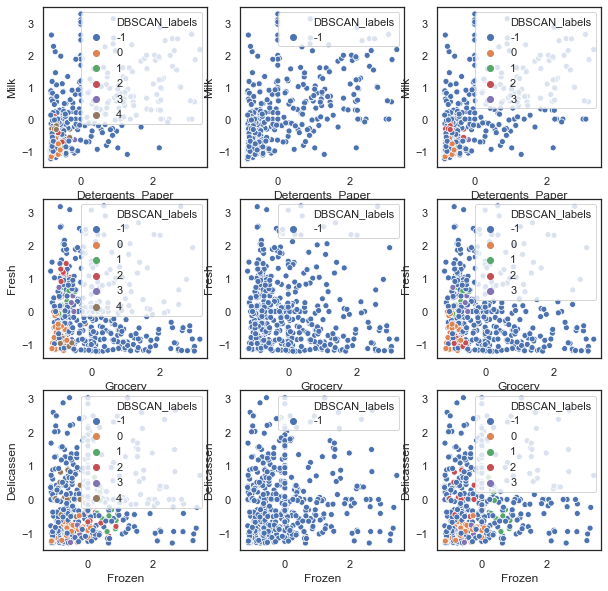

In [89]:
fig, ax = plt.subplots(figsize=(10,10), nrows=3, ncols=3)

plt.sca(ax[0][0])
sns.scatterplot(data=cus_km, x='Detergents_Paper', y='Milk', hue='DBSCAN_labels', palette='deep')
plt.sca(ax[0][1])
sns.scatterplot(data=cus_km_2, x='Detergents_Paper', y='Milk', hue='DBSCAN_labels', palette='deep')
plt.sca(ax[0][2])
sns.scatterplot(data=cus_km_3, x='Detergents_Paper', y='Milk', hue='DBSCAN_labels', palette='deep')

plt.sca(ax[1][0])
sns.scatterplot(data=cus_km, x='Grocery', y='Fresh', hue='DBSCAN_labels', palette='deep')
plt.sca(ax[1][1])
sns.scatterplot(data=cus_km_2, x='Grocery', y='Fresh', hue='DBSCAN_labels', palette='deep')
plt.sca(ax[1][2])
sns.scatterplot(data=cus_km_3, x='Grocery', y='Fresh', hue='DBSCAN_labels', palette='deep')

plt.sca(ax[2][0])
sns.scatterplot(data=cus_km, x='Frozen', y='Delicassen', hue='DBSCAN_labels', palette='deep')
plt.sca(ax[2][1])
sns.scatterplot(data=cus_km_2, x='Frozen', y='Delicassen', hue='DBSCAN_labels', palette='deep')
plt.sca(ax[2][2])
sns.scatterplot(data=cus_km_3, x='Frozen', y='Delicassen', hue='DBSCAN_labels', palette='deep')

plt.show();

In [ ]:
#The third column seems to be the best option